### Explicación detallada del paso
# Ejercicio 2

En este paso, estamos abordando los aspectos clave de la operación. La idea es que el lector entienda claramente los objetivos detrás de este código. Se proporciona una descripción más completa de lo que está sucediendo a continuación.

### Explicación detallada del paso
Ahora mismo se hará un análisis de los precios del combustible en colombia en el año 2023.

En este paso, estamos abordando los aspectos clave de la operación. La idea es que el lector entienda claramente los objetivos detrás de este código. Se proporciona una descripción más completa de lo que está sucediendo a continuación.

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

### Explicación detallada del paso
Importación de la Base de Datos

En este paso, estamos abordando los aspectos clave de la operación. La idea es que el lector entienda claramente los objetivos detrás de este código. Se proporciona una descripción más completa de lo que está sucediendo a continuación.

In [86]:
combustible_1 = pd.read_csv("datos/2023-1.csv")
combustible_2 = pd.read_csv("datos/2023-2.csv")
combustible_3 = pd.read_csv("datos/2023-3.csv")
combustible_4 = pd.read_csv("datos/2023-4.csv")

In [87]:
df_2023 = pd.concat([combustible_1, combustible_2, combustible_3, combustible_4], ignore_index=True)
df_2023.head(10)

,BANDERA,NOMBRE COMERCIAL,PRODUCTO,FECHA REGISTRO,DEPARTAMENTO,MUNICIPIO,VALOR PRECIO
0,TERPEL,ESTACION DE SERVICIO SERVICENTRO LA PEDRERA,DIESEL,01-Jan-2023,AMAZONAS,LA PEDRERA,15000.0
1,TERPEL,ESTACION DE SERVICIO SERVICENTRO LA PEDRERA,GASOLINA MOTOR,01-Jan-2023,AMAZONAS,LA PEDRERA,15500.0
2,TERPEL,BALSA EL CONDOR,GASOLINA MOTOR,01-Jan-2023,AMAZONAS,LETICIA,11380.0
3,TERPEL,BALSA EL CONDOR,DIESEL,01-Jan-2023,AMAZONAS,LETICIA,10840.0
4,TERPEL,ESTACION DE SERVICIO DISTRIBUIDORA LOS COMUNEROS,GASOLINA MOTOR,01-Jan-2023,AMAZONAS,LETICIA,11380.0
5,TERPEL,ESTACION DE SERVICIO DISTRIBUIDORA LOS COMUNEROS,GASOLINA MOTOR,01-Jan-2023,AMAZONAS,LETICIA,11380.0
6,TERPEL,ESTACION DE SERVICIO DISTRIBUIDORA LOS COMUNEROS,DIESEL,01-Jan-2023,AMAZONAS,LETICIA,10671.0
7,TEXACO,EDS COMDECOM ABRIAQUI,GASOLINA MOTOR,01-Jan-2023,ANTIOQUIA,ABRIAQUÍ,11870.0
8,TEXACO,EDS COMDECOM ABRIAQUI,DIESEL,01-Jan-2023,ANTIOQUIA,ABRIAQUÍ,10910.0
9,TEXACO,ESTACIÓN DE SERVICIO Y MALL SANTA LUCIA S.A.S.,DIESEL,01-Jan-2023,ANTIOQUIA,AMAGÁ,9610.0


### Explicación detallada del paso
Al unir todos los trimestres del 2023 y guardarlos en un nuevo dataframe llamado 'df_2023', se obtiene un total de los registros de todos los precios de los combustibles en el país del año de 2023

En este paso, estamos abordando los aspectos clave de la operación. La idea es que el lector entienda claramente los objetivos detrás de este código. Se proporciona una descripción más completa de lo que está sucediendo a continuación.

In [88]:
df_2023.shape

(268017, 7)

In [89]:
df_2023.columns

Index(['BANDERA', 'NOMBRE COMERCIAL', 'PRODUCTO', 'FECHA REGISTRO',
       'DEPARTAMENTO', 'MUNICIPIO', 'VALOR PRECIO'],
      dtype='object')

In [90]:
df_2023.columns=["bandera", "nombreCo", "producto","fecha","depto","munic","valor"]

In [91]:
df_2023["bandera"].unique()

array(['TERPEL', 'TEXACO', 'PRIMAX', 'ZEUSS\xa0', 'BIOMAX',
       'PETROMIL\xa0', 'ESSO', 'BRIO\xa0', 'PETROBRAS', 'PUMA',
       'PLUS MAS', 'ECOS', 'OCTANO', 'AYATAWACOOP', 'DISCOWACOOP',
       'COOMULPINORT', 'DISCOM', 'P Y B', 'PETRODECOL', 'PETRDECOL',
       'SAVE', 'PROXXON', 'ZAPATA Y VELASQUEZ\xa0'], dtype=object)

In [92]:
len(df_2023["bandera"].unique())

23

### Explicación detallada del paso
**Productos**

En este paso, estamos abordando los aspectos clave de la operación. La idea es que el lector entienda claramente los objetivos detrás de este código. Se proporciona una descripción más completa de lo que está sucediendo a continuación.

In [93]:
df_2023["producto"].value_counts()

producto
GASOLINA MOTOR    127338
DIESEL            108279
EXTRA              32400
Name: count, dtype: int64

### Explicación detallada del paso
### **Filtrando por el tipo de producto**

En este paso, estamos abordando los aspectos clave de la operación. La idea es que el lector entienda claramente los objetivos detrás de este código. Se proporciona una descripción más completa de lo que está sucediendo a continuación.

### Explicación detallada del paso
Para poder hacer el estudio de cada uno de los tipos de combustibles filtremos nuestra base de datos.

En este paso, estamos abordando los aspectos clave de la operación. La idea es que el lector entienda claramente los objetivos detrás de este código. Se proporciona una descripción más completa de lo que está sucediendo a continuación.

In [94]:
gasolina=df_2023[df_2023["producto"]=="GASOLINA MOTOR"]
diesel =df_2023[df_2023["producto"]=="DIESEL"]
extra =df_2023[df_2023["producto"]=="EXTRA"]

In [95]:
gasolina.head()

,bandera,nombreCo,producto,fecha,depto,munic,valor
1,TERPEL,ESTACION DE SERVICIO SERVICENTRO LA PEDRERA,GASOLINA MOTOR,01-Jan-2023,AMAZONAS,LA PEDRERA,15500.0
2,TERPEL,BALSA EL CONDOR,GASOLINA MOTOR,01-Jan-2023,AMAZONAS,LETICIA,11380.0
4,TERPEL,ESTACION DE SERVICIO DISTRIBUIDORA LOS COMUNEROS,GASOLINA MOTOR,01-Jan-2023,AMAZONAS,LETICIA,11380.0
5,TERPEL,ESTACION DE SERVICIO DISTRIBUIDORA LOS COMUNEROS,GASOLINA MOTOR,01-Jan-2023,AMAZONAS,LETICIA,11380.0
7,TEXACO,EDS COMDECOM ABRIAQUI,GASOLINA MOTOR,01-Jan-2023,ANTIOQUIA,ABRIAQUÍ,11870.0


In [96]:
diesel.head()

,bandera,nombreCo,producto,fecha,depto,munic,valor
0,TERPEL,ESTACION DE SERVICIO SERVICENTRO LA PEDRERA,DIESEL,01-Jan-2023,AMAZONAS,LA PEDRERA,15000.0
3,TERPEL,BALSA EL CONDOR,DIESEL,01-Jan-2023,AMAZONAS,LETICIA,10840.0
6,TERPEL,ESTACION DE SERVICIO DISTRIBUIDORA LOS COMUNEROS,DIESEL,01-Jan-2023,AMAZONAS,LETICIA,10671.0
8,TEXACO,EDS COMDECOM ABRIAQUI,DIESEL,01-Jan-2023,ANTIOQUIA,ABRIAQUÍ,10910.0
9,TEXACO,ESTACIÓN DE SERVICIO Y MALL SANTA LUCIA S.A.S.,DIESEL,01-Jan-2023,ANTIOQUIA,AMAGÁ,9610.0


In [97]:
extra.head()

,bandera,nombreCo,producto,fecha,depto,munic,valor
15,TERPEL,ESTACION DE SERVICIO POPALITO,EXTRA,01-Jan-2023,ANTIOQUIA,BARBOSA,18760.0
16,TERPEL,ESTACION DE SERVICIO PUERTAS DEL NORDESTE,EXTRA,01-Jan-2023,ANTIOQUIA,BARBOSA,19400.0
20,PRIMAX,ESTACION DE SERVICIO PRIMAX AUTOPISTA,EXTRA,01-Jan-2023,ANTIOQUIA,BELLO,19580.0
21,TERPEL,TERPEL FONTIDUENO,EXTRA,01-Jan-2023,ANTIOQUIA,BELLO,20520.0
31,ZEUSS,ESTACION DE SERVICIO LA CRISTALINA,EXTRA,01-Jan-2023,ANTIOQUIA,CISNEROS,20000.0


In [98]:
gasolina["valor"].describe()

count    1.273380e+05
mean     1.262035e+04
std      4.135571e+04
min      1.000000e+00
25%      1.103000e+04
50%      1.254000e+04
75%      1.398000e+04
max      1.475015e+07
Name: valor, dtype: float64

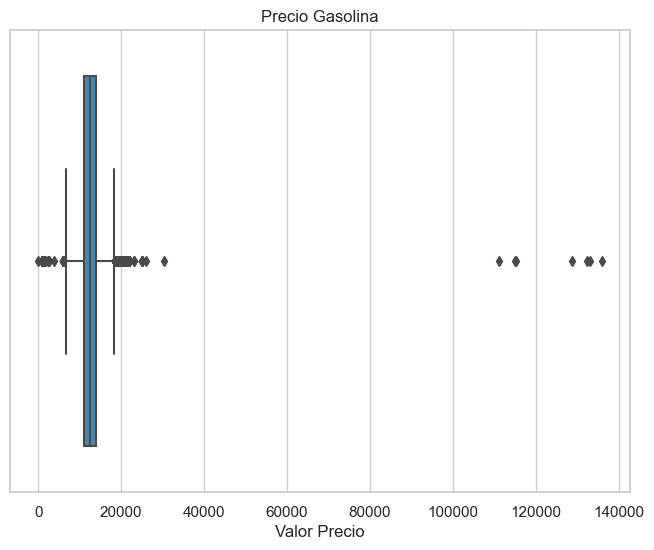

In [138]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='valor', data=gasolina, color="#3B89BD")

ax.set_xlabel("Valor Precio")
plt.title('Precio Gasolina')
plt.show()

In [100]:
print("Datos faltantes: ",gasolina["valor"].isna().sum())

Datos faltantes:  0


In [101]:
def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for idx, value in enumerate(data):
        z_score = (value - mean) / std
        if np.abs(z_score) > thres:
            outliers.append(idx)
    
    return outliers

In [102]:
out=detect_outliers_zscore(gasolina["valor"])
len(out)

4

In [103]:
gasolina.iloc[out, gasolina.columns.get_loc('valor')] = np.nan

In [104]:
imp = IterativeImputer(max_iter=5, random_state=500)

# Imputar los datos faltantes
gasolina_imputado = gasolina.copy()
gasolina_imputado[['valor']] = imp.fit_transform(gasolina[['valor']])


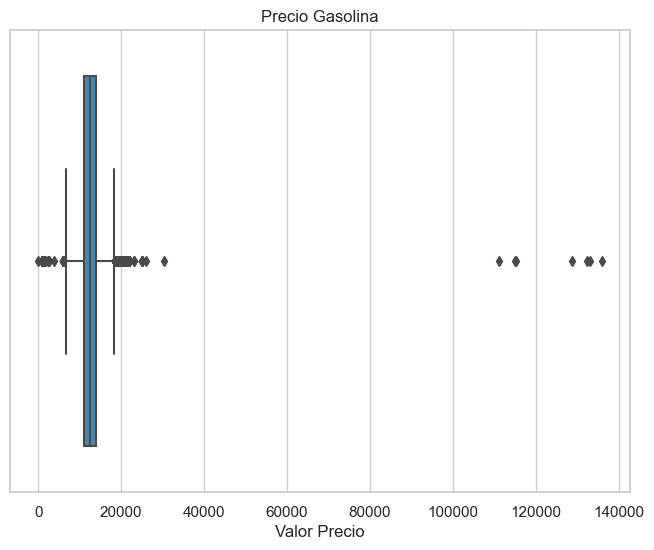

In [137]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='valor', data=gasolina_imputado, color="#3B89BD")

ax.set_xlabel("Valor Precio")
plt.title('Precio Gasolina')
plt.show()

### Explicación detallada del paso
Con esto se logró la imputación de los valores extremos del precio de la gasolina en 2023. Detectamos los valores atípicos utilizando los z-scores y realizamos la imputación con el método iterativo. La idea es aplicar este mismo proceso a los otros dos productos.

En este paso, estamos abordando los aspectos clave de la operación. La idea es que el lector entienda claramente los objetivos detrás de este código. Se proporciona una descripción más completa de lo que está sucediendo a continuación.

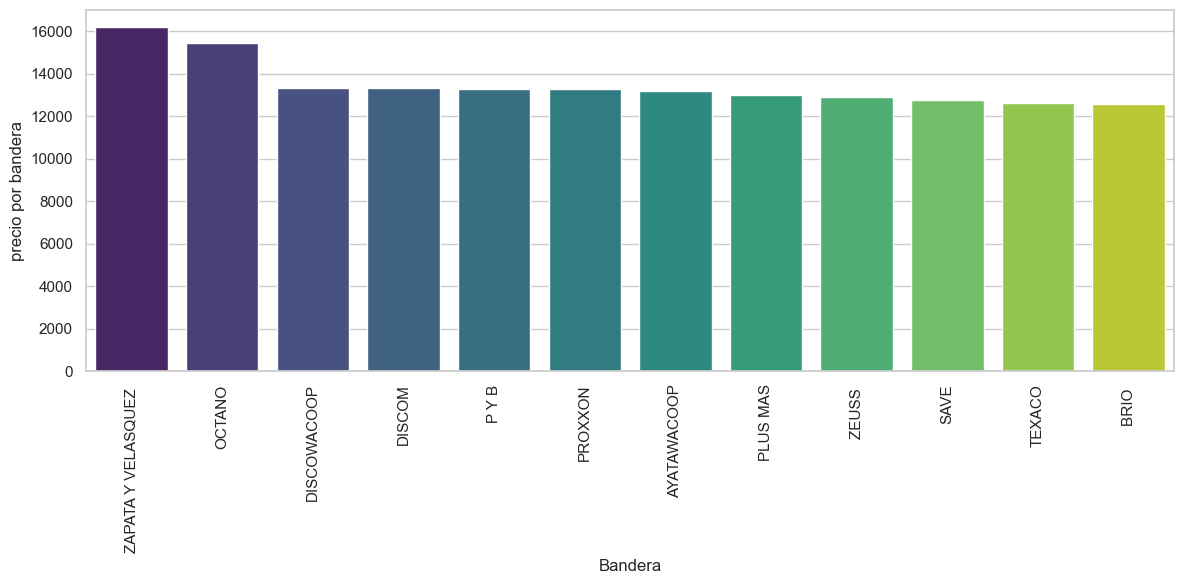

In [140]:
gas_bandera = gasolina_imputado.groupby('bandera')['valor'].mean().reset_index()
gas_bandera = gas_bandera.sort_values(by='valor',ascending=False)
gas_bandera=gas_bandera.head(12)

plt.figure(figsize=(12, 6))
sns.barplot(data=gas_bandera, x='bandera', y='valor', palette='viridis')
plt.xlabel('Bandera')
plt.ylabel('precio por bandera')
plt.xticks(rotation=90)
plt.tight_layout()


In [107]:
gas_bandera

,bandera,valor
21,ZAPATA Y VELASQUEZ,16200.487903
8,OCTANO,15444.754954
5,DISCOWACOOP,13355.970158
4,DISCOM,13354.115337
9,P Y B,13288.808000
16,PROXXON,13272.784810
0,AYATAWACOOP,13189.970560
14,PLUS MAS,13014.630485
22,ZEUSS,12928.796348
18,SAVE,12790.250000


### Explicación detallada del paso
De la gráfica anterior,se muestran las 12 empresas distribuidoras de gasolina con los precios mas altos en colombia en el 2023. siendo "OCTANO" con el valor mas alto 15055. 

En este paso, estamos abordando los aspectos clave de la operación. La idea es que el lector entienda claramente los objetivos detrás de este código. Se proporciona una descripción más completa de lo que está sucediendo a continuación.

### Explicación detallada del paso
#### ****Diesel****

En este paso, estamos abordando los aspectos clave de la operación. La idea es que el lector entienda claramente los objetivos detrás de este código. Se proporciona una descripción más completa de lo que está sucediendo a continuación.

In [108]:
diesel["valor"].describe()

count    108279.000000
mean       9190.252561
std        1387.018242
min           0.000000
25%        8790.000000
50%        9270.000000
75%        9600.000000
max      102420.000000
Name: valor, dtype: float64

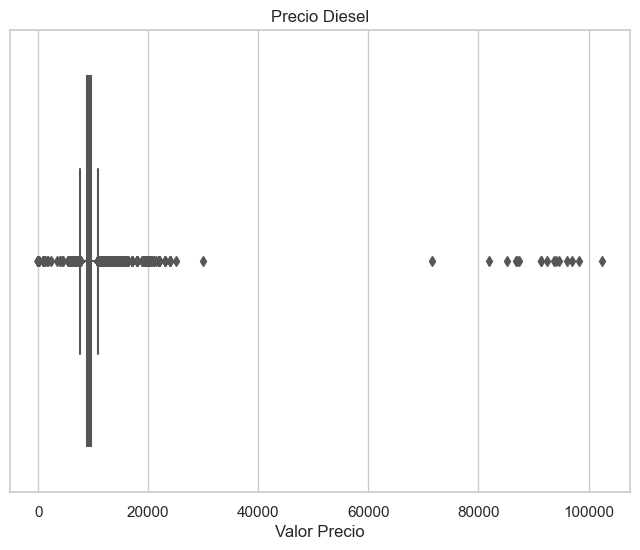

In [109]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='valor', data=diesel, color="#B452CD")

ax.set_xlabel("Valor Precio")
plt.title('Precio Diesel')
plt.show()

In [110]:
print("Datos faltantes: ",diesel["valor"].isna().sum())

Datos faltantes:  0


### Explicación detallada del paso
Vemos que en el precio del diesel, tampoco hay valores faltantes pero si una gran cantidad de valores atípicos.

En este paso, estamos abordando los aspectos clave de la operación. La idea es que el lector entienda claramente los objetivos detrás de este código. Se proporciona una descripción más completa de lo que está sucediendo a continuación.

In [111]:
def detect_outliers_zscore2(data):
    outliers = []
    thres = 2
    mean = np.mean(data)
    std = np.std(data)
    for idx, value in enumerate(data):
        z_score = (value - mean) / std
        if np.abs(z_score) > thres:
            outliers.append(idx)
    
    return outliers

In [112]:
out=detect_outliers_zscore2(diesel["valor"])
len(out)

1378

### Explicación detallada del paso
Existen 8614 valores por fuera de 2*RIQ.

En este paso, estamos abordando los aspectos clave de la operación. La idea es que el lector entienda claramente los objetivos detrás de este código. Se proporciona una descripción más completa de lo que está sucediendo a continuación.

In [113]:
diesel.iloc[out, diesel.columns.get_loc('valor')] = np.nan

In [114]:
imp = IterativeImputer(max_iter=5, random_state=500)

# Imputar los datos faltantes
diesel_imputado = diesel.copy()
diesel_imputado[['valor']] = imp.fit_transform(diesel[['valor']])

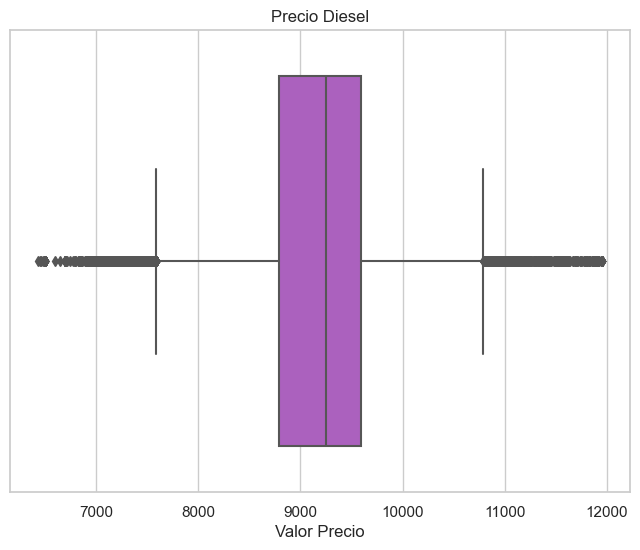

In [115]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='valor', data=diesel_imputado, color="#B452CD")

ax.set_xlabel("Valor Precio")
plt.title('Precio Diesel')
plt.show()

### Explicación detallada del paso
Vemos que en este caso, a diferencia de la gasolina, parece ser que no se detectaron todos los datos, puesto que nuestra función para detectarlos solo está tomando los que están por fuera de 2 veces el RIQ. Pero aun así hubo una gran mejoría con la imputación de los datos más extremos.

En este paso, estamos abordando los aspectos clave de la operación. La idea es que el lector entienda claramente los objetivos detrás de este código. Se proporciona una descripción más completa de lo que está sucediendo a continuación.

### Explicación detallada del paso
##### **Otros análisis:**

En este paso, estamos abordando los aspectos clave de la operación. La idea es que el lector entienda claramente los objetivos detrás de este código. Se proporciona una descripción más completa de lo que está sucediendo a continuación.

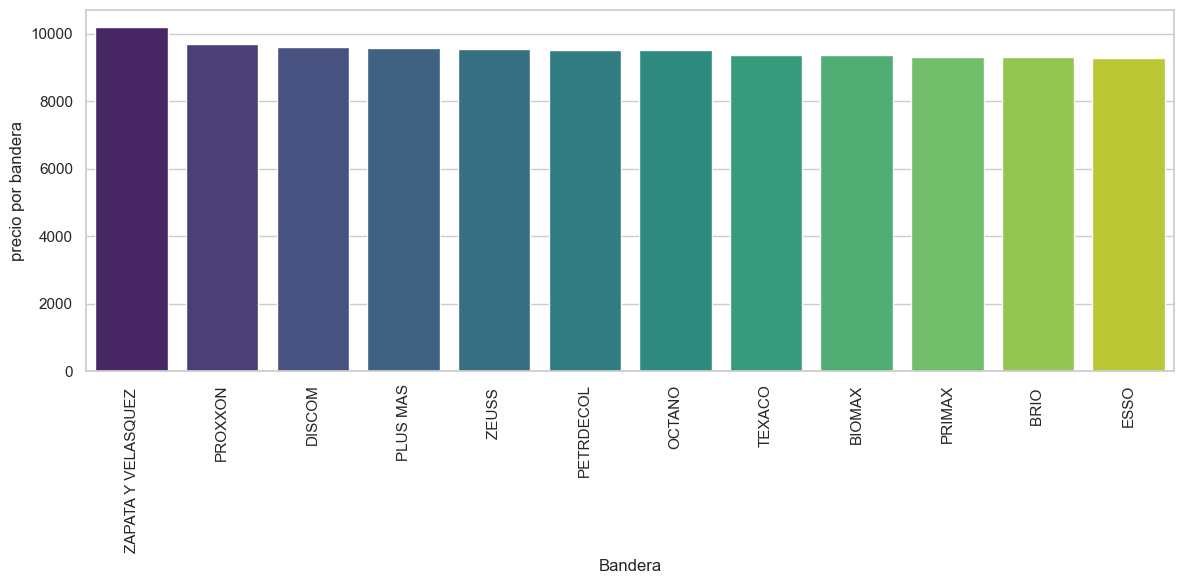

In [141]:
diesel_bandera = diesel_imputado.groupby('bandera')['valor'].mean().reset_index()
diesel_bandera = diesel_bandera.sort_values(by='valor',ascending=False)
diesel_bandera=diesel_bandera.head(12)

plt.figure(figsize=(12, 6))
sns.barplot(data=diesel_bandera, x='bandera', y='valor', palette='viridis')
plt.xlabel('Bandera')
plt.ylabel('precio por bandera')
plt.xticks(rotation=90)
plt.tight_layout()

In [117]:
diesel_bandera

,bandera,valor
21,ZAPATA Y VELASQUEZ,10192.590164
16,PROXXON,9690.997530
4,DISCOM,9607.538594
14,PLUS MAS,9583.121113
22,ZEUSS,9560.701087
10,PETRDECOL,9526.852775
8,OCTANO,9523.342944
20,TEXACO,9372.438144
1,BIOMAX,9359.138161
15,PRIMAX,9310.284844


### Explicación detallada del paso
Aqui se puede ver que el precio del diesel por bandera no cambia mucho, estas 12 empresas con el diesel mas alto tienen precios cercanos a 9.300.

En este paso, estamos abordando los aspectos clave de la operación. La idea es que el lector entienda claramente los objetivos detrás de este código. Se proporciona una descripción más completa de lo que está sucediendo a continuación.

### Explicación detallada del paso
#### ****Extra****

En este paso, estamos abordando los aspectos clave de la operación. La idea es que el lector entienda claramente los objetivos detrás de este código. Se proporciona una descripción más completa de lo que está sucediendo a continuación.

In [118]:
extra["valor"].describe()

count     32400.000000
mean      19132.729537
std        3089.081601
min           0.000000
25%       19200.000000
50%       19720.000000
75%       20000.000000
max      200000.000000
Name: valor, dtype: float64

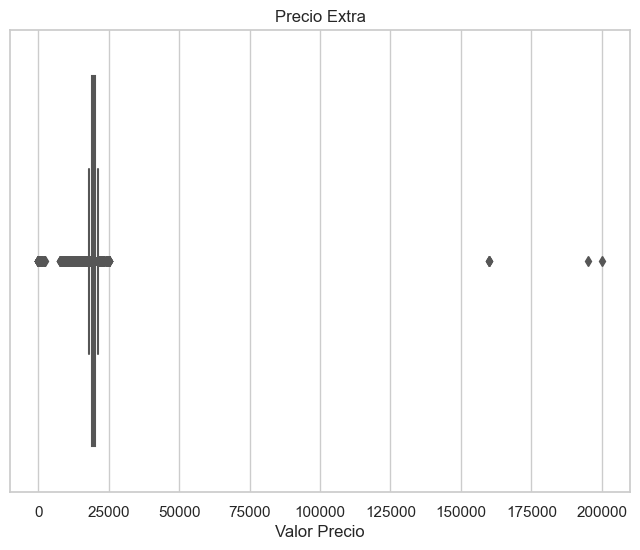

In [119]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='valor', data=extra, color="#4234bb")

ax.set_xlabel("Valor Precio")
plt.title('Precio Extra')
plt.show()

In [120]:
print("Datos faltantes: ",extra["valor"].isna().sum())

Datos faltantes:  0


In [121]:
out=detect_outliers_zscore2(extra["valor"])
len(out)

1913

In [122]:
extra.iloc[out, extra.columns.get_loc('valor')] = np.nan

In [123]:
imp = IterativeImputer(max_iter=5, random_state=500)

# Imputar los datos faltantes
extra_imputado = extra.copy()
extra_imputado[['valor']] = imp.fit_transform(extra[['valor']])

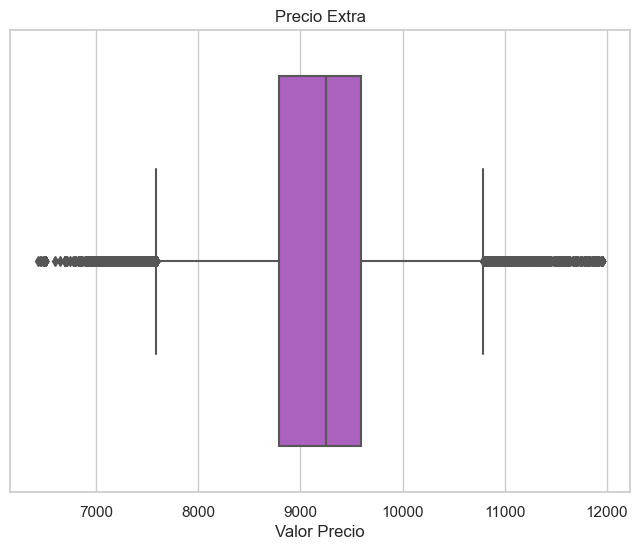

In [124]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='valor', data=diesel_imputado, color="#4234bb")

ax.set_xlabel("Valor Precio")
plt.title('Precio Extra')
plt.show()

### Explicación detallada del paso
En el caso del combustible extra pasó algo similar a con el diesel, con la imputación mejoró la distribución de la variable, aun cuando se siguen presentando datos atípicos, esto es razonable, puesto que el valor del extra varía en gran manera.

En este paso, estamos abordando los aspectos clave de la operación. La idea es que el lector entienda claramente los objetivos detrás de este código. Se proporciona una descripción más completa de lo que está sucediendo a continuación.

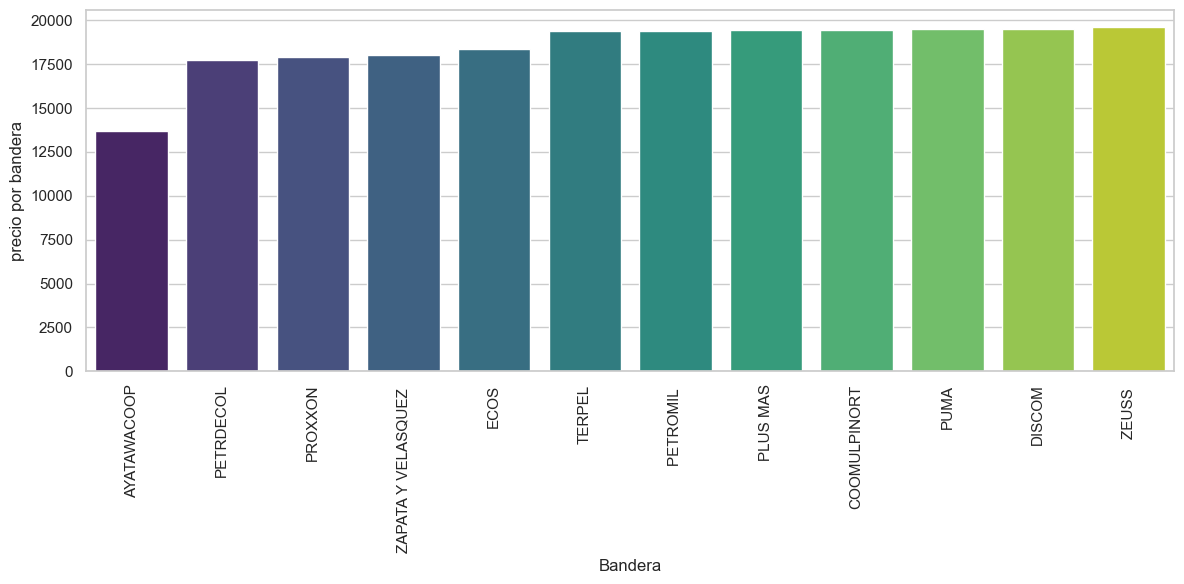

In [142]:
extra_bandera = extra_imputado.groupby('bandera')['valor'].mean().reset_index()
extra_bandera = extra_bandera.sort_values(by='valor',ascending=True)
extra_bandera=extra_bandera.head(12)

plt.figure(figsize=(12, 6))
sns.barplot(data=extra_bandera, x='bandera', y='valor', palette='viridis')
plt.xlabel('Bandera')
plt.ylabel('precio por bandera')
plt.xticks(rotation=90)
plt.tight_layout()

In [126]:
extra_bandera

,bandera,valor
0,AYATAWACOOP,13688.111111
8,PETRDECOL,17744.115443
14,PROXXON,17904.211294
19,ZAPATA Y VELASQUEZ,18047.000000
5,ECOS,18358.338476
17,TERPEL,19397.597860
11,PETROMIL,19400.238843
12,PLUS MAS,19466.714286
3,COOMULPINORT,19478.387931
15,PUMA,19487.235739


### Explicación detallada del paso
Puesto que el combustible "Extra" es el que tiene el precio promedio mas alto, con la grafica anterior vemos que la bandera "AYATAWACOOP" es el que tiene menor precio promedio 13.600, a diferencia de las otras empresas que sus precios ya rodean los 20.000 pesos colombianos.

En este paso, estamos abordando los aspectos clave de la operación. La idea es que el lector entienda claramente los objetivos detrás de este código. Se proporciona una descripción más completa de lo que está sucediendo a continuación.

### Explicación detallada del paso
### **Georeferenciación: precio de la gasolina por departamento**

En este paso, estamos abordando los aspectos clave de la operación. La idea es que el lector entienda claramente los objetivos detrás de este código. Se proporciona una descripción más completa de lo que está sucediendo a continuación.

In [127]:
import geopandas as gpd 
import descartes    

In [128]:
mapa_col = gpd.read_file("datos\COLOMBIA\COLOMBIA.shp")

In [129]:
gasolina_map=gasolina_imputado.copy()

In [130]:

dpto_1 = gasolina_map['depto'].str.lower()
dpto_2 = mapa_col['DPTO_CNMBR'].str.lower()

# Encontrar los índices donde los valores de dpto_1 no están en dpto_2
M1 = np.where(~dpto_1.isin(dpto_2))[0]  # Retorna los índices de los valores no coincidentes

# Reemplazar "?" con "ñ" en dpto_2
dpto_2 = dpto_2.str.replace("\?", "ñ", regex=True)

# Reemplazar "archipielago de san andres" con el texto completo en dpto_2
dpto_2 = dpto_2.str.replace("archipielago de san andres", 
                            "archipielago de san andres, santa catalina y providencia", regex=False)

M1 = np.where(~dpto_1.isin(dpto_2))[0] 

# Añadir las columnas 'codigo' con los valores modificados
gasolina_map.loc[:, 'codigo'] = dpto_1
mapa_col.loc[:, 'codigo'] = dpto_2

In [131]:
gasolina_map["codigo"] = dpto_1
mapa_col["codigo"] = dpto_2

In [132]:
Datos_tot = pd.merge(mapa_col, gasolina_map , on ='codigo', how = 'outer')
Datos_tot.head(3)

,OBJECTID,DPTO_CCDGO,DPTO_NANO_,DPTO_CNMBR,DPTO_CACTO,DPTO_NAREA,DPTO_CSMBL,DPTO_NANO,PAIS_PAIS_,SHAPE_Leng,SHAPE_Area,geometry,codigo,bandera,nombreCo,producto,fecha,depto,munic,valor
0,1,05,1886,ANTIOQUIA,Constitucion Politica de 1886,6.306333e+10,3,2005,1,21.137035,5.155783,"POLYGON ((-76.40481 8.85708, -76.40440 8.85625...",antioquia,TEXACO,EDS COMDECOM ABRIAQUI,GASOLINA MOTOR,01-Jan-2023,ANTIOQUIA,ABRIAQUÍ,11870.0
1,1,05,1886,ANTIOQUIA,Constitucion Politica de 1886,6.306333e+10,3,2005,1,21.137035,5.155783,"POLYGON ((-76.40481 8.85708, -76.40440 8.85625...",antioquia,TEXACO,ESTACIÓN DE SERVICIO Y MALL SANTA LUCIA S.A.S.,GASOLINA MOTOR,01-Jan-2023,ANTIOQUIA,AMAGÁ,11200.0
2,1,05,1886,ANTIOQUIA,Constitucion Politica de 1886,6.306333e+10,3,2005,1,21.137035,5.155783,"POLYGON ((-76.40481 8.85708, -76.40440 8.85625...",antioquia,TERPEL,ESTACION DE SERVICIO POPALITO,GASOLINA MOTOR,01-Jan-2023,ANTIOQUIA,BARBOSA,10399.0


In [133]:
datos_unidos2 = (
    Datos_tot
    .groupby(['codigo', 'DPTO_NANO_', 'DPTO_NAREA', 'DPTO_CSMBL', 'DPTO_NANO', 'PAIS_PAIS_', 'SHAPE_Leng', 'SHAPE_Area'], as_index=False)  # Agrupa los datos y evita usar los grupos como índice
    .agg(precio_prom_dpto=('valor', 'mean'))  # Calcula la media de 'valor' y la asigna a 'precio_prom_dpto'
)

In [134]:
datos_unidos2

,codigo,DPTO_NANO_,DPTO_NAREA,DPTO_CSMBL,DPTO_NANO,PAIS_PAIS_,SHAPE_Leng,SHAPE_Area,precio_prom_dpto
0,amazonas,1991,1.100465e+11,3,2005,28,24.747842,8.921607,15236.346154
1,antioquia,1886,6.306333e+10,3,2005,1,21.137035,5.155783,13093.399409
2,arauca,1991,2.380556e+10,3,2005,25,9.162939,1.940327,12779.423077
3,"archipielago de san andres, santa catalina y p...",1991,4.960214e+04,3,2005,12,0.650698,0.004064,14224.962963
4,atlantico,1910,3.326730e+09,3,2005,2,2.461077,0.274825,12350.908540
5,bogota d.c.,0,1.633209e+09,3,2005,3,3.731288,0.133045,12574.697156
6,bolivar,1886,2.666559e+10,3,2005,4,15.706980,2.191055,12633.533408
7,boyaca,1886,2.307705e+10,3,2005,5,15.280968,1.883315,13239.346864
8,caldas,1905,7.415933e+09,3,2005,6,6.614200,0.604712,13045.504036
9,caqueta,1981,9.007665e+10,3,2005,7,19.850907,7.316017,13208.076658


In [135]:
mapa_col['promedio_precio'] = datos_unidos2["precio_prom_dpto"]

mapa_col

,OBJECTID,DPTO_CCDGO,DPTO_NANO_,DPTO_CNMBR,DPTO_CACTO,DPTO_NAREA,DPTO_CSMBL,DPTO_NANO,PAIS_PAIS_,SHAPE_Leng,SHAPE_Area,geometry,codigo,promedio_precio
0,1,05,1886,ANTIOQUIA,Constitucion Politica de 1886,6.306333e+10,3,2005,1,21.137035,5.155783,"POLYGON ((-76.40481 8.85708, -76.40440 8.85625...",antioquia,15236.346154
1,2,08,1910,ATLANTICO,Ley 21 de 1910,3.326730e+09,3,2005,2,2.461077,0.274825,"POLYGON ((-74.82969 11.04992, -74.82937 11.049...",atlantico,13093.399409
2,3,11,0,BOGOTA D.C.,None,1.633209e+09,3,2005,3,3.731288,0.133045,"POLYGON ((-74.07274 4.83565, -74.07217 4.83505...",bogota d.c.,12779.423077
3,4,13,1886,BOLIVAR,Constitucion Politica de 1886,2.666559e+10,3,2005,4,15.706980,2.191055,"MULTIPOLYGON (((-75.24966 10.79804, -75.24926 ...",bolivar,14224.962963
4,5,15,1886,BOYACA,Constitucion Politica de 1886,2.307705e+10,3,2005,5,15.280968,1.883315,"POLYGON ((-72.01129 7.00944, -72.01029 7.00912...",boyaca,12350.908540
5,6,17,1905,CALDAS,11 de Abril de 1905,7.415933e+09,3,2005,6,6.614200,0.604712,"POLYGON ((-74.67118 5.77127, -74.67112 5.77115...",caldas,12574.697156
6,7,18,1981,CAQUETA,Ley 78 del 29 de Diciembre de 1981,9.007665e+10,3,2005,7,19.850907,7.316017,"POLYGON ((-74.91094 2.96445, -74.90768 2.96367...",caqueta,12633.533408
7,8,19,1857,CAUCA,15 de junio de 1857,3.064331e+10,3,2005,8,13.352092,2.485633,"POLYGON ((-76.45841 3.32857, -76.45819 3.32857...",cauca,13239.346864
8,9,20,1967,CESAR,Ley 25 21 de junio de 1967,2.228367e+10,3,2005,9,12.597031,1.834978,"POLYGON ((-73.45957 10.86878, -73.45905 10.868...",cesar,13045.504036
9,10,23,1951,CORDOBA,Ley 9 del 18 de Diciembre de 1951,2.504194e+10,3,2005,10,8.982757,2.053760,"POLYGON ((-75.92261 9.43892, -75.92209 9.43846...",cordoba,13208.076658


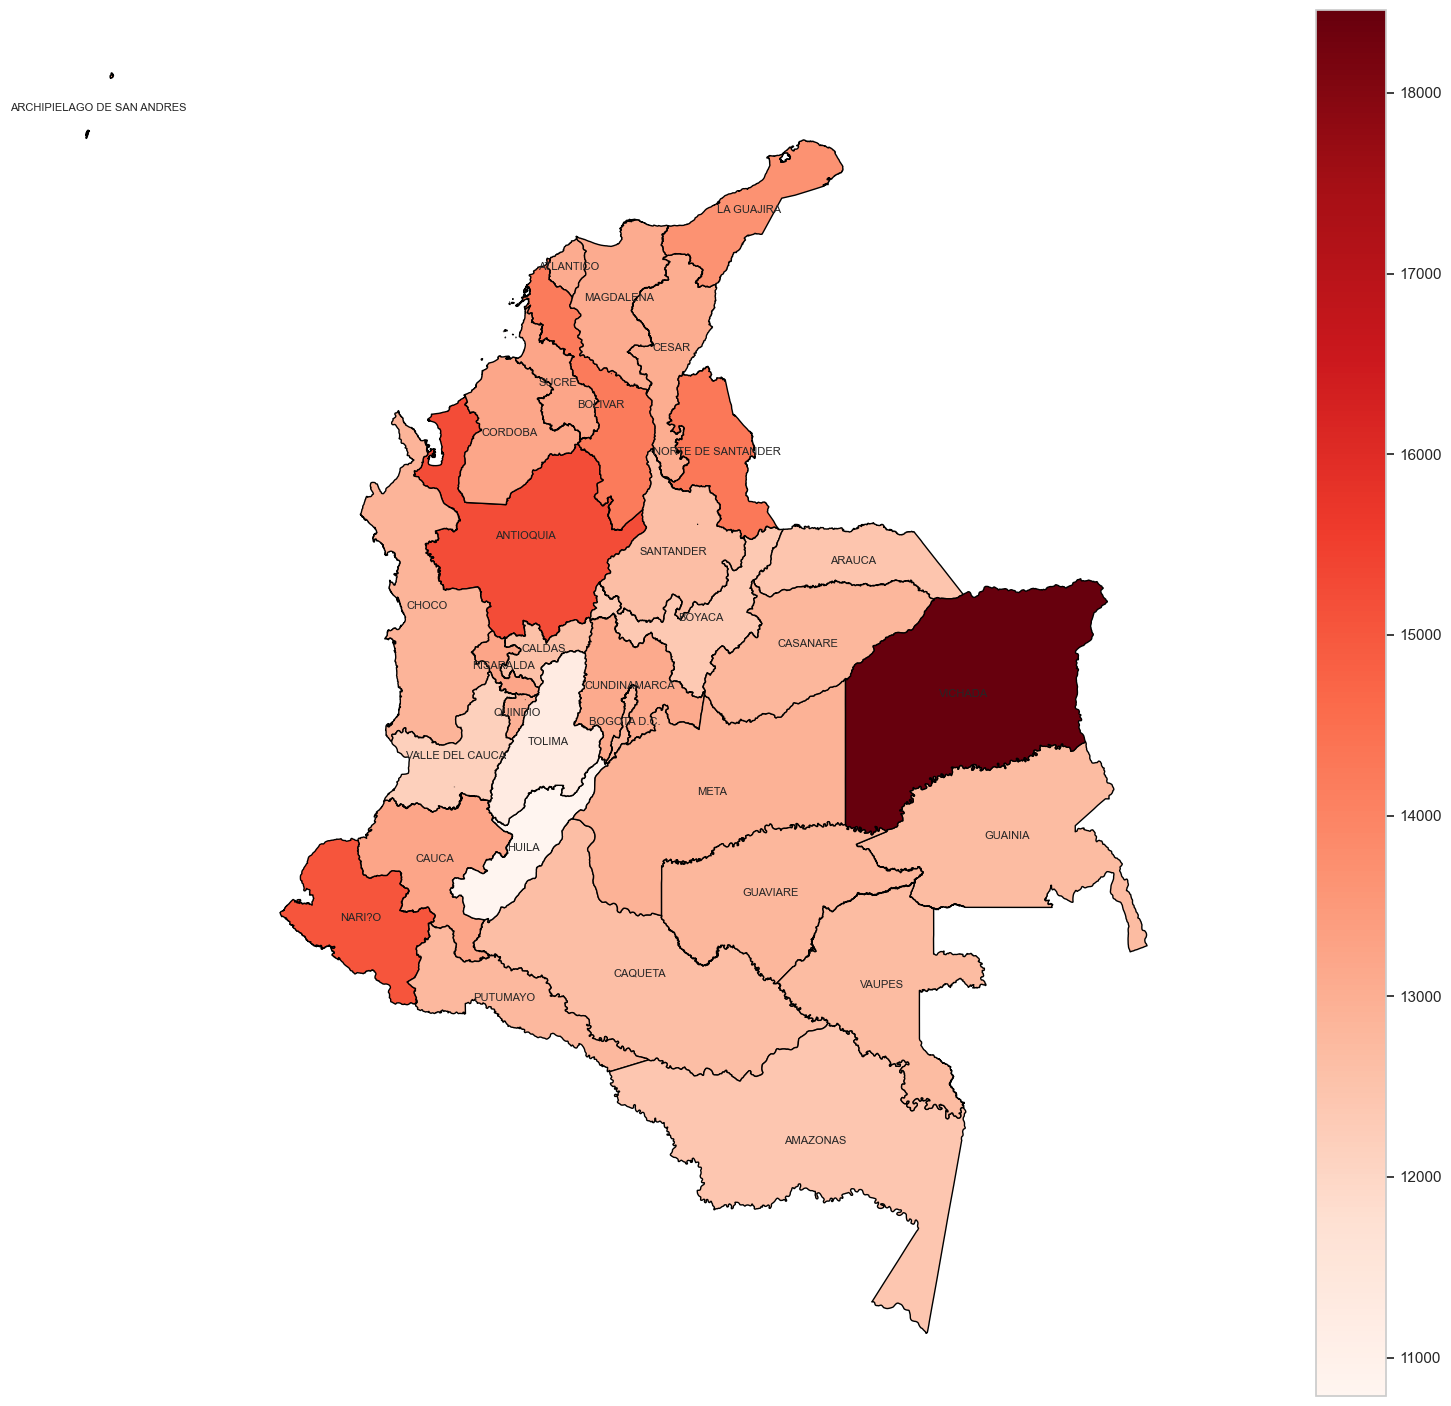

In [136]:
mapa_col.plot(column="promedio_precio",figsize=(30,18), legend=True, edgecolor="black",cmap="Reds")

for index,row in mapa_col.iterrows():
    xy=row['geometry'].centroid.coords[:]
    xytext=row['geometry'].centroid.coords[:]
    plt.annotate(row['DPTO_CNMBR'],xy=xy[0], xytext=xytext[0],  horizontalalignment='center',verticalalignment='center',fontsize=8)
    plt.axis('off')
